**Dataset** **Link**: https://www.kaggle.com/datasets/shirtgm/bladder-cancer-classification

---

**Dataset** **description**:

---
This is an image dataset organized into folders representing different categories. The dataset contains images related to bladder cancer, categorized into **muscle-invasive bladder cancer (MIBC)** and **non-muscle-invasive bladder cancer (NMIBC)**. The data is further divided by research or medical centers (e.g., Center_1, Center_2, etc.), reflecting a multi-center data collection approach.

- **Folder Structure**:
  - `Center_1`: Contains subfolders for "muscle invasive bladder cancer" and "non muscle invasive bladder cancer".
  - `Center_2`: Same structure as Center_1.
  - `Center_3`: Same structure as Center_1.
  - `Center_4`: Same structure as Center_1.

- **Purpose**:  
  This dataset is suitable for building machine learning models, such as image classification or segmentation models, aimed at diagnosing or studying bladder cancer. It may also support domain adaptation studies, given the multi-center data organization.

- **Dataset Size**:  
  Approximately 174.54 MB.

- **Potential Use Cases**:
  1. Binary classification (MIBC vs. NMIBC).
  2. Transfer learning experiments.
  3. Medical image analysis and research.
  4. Multi-center study for generalization and variability analysis.

For further details, the dataset’s Kaggle page might include metadata, additional annotations, or preprocessing instructions.


**Mounting Drive for the Dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
pip install opencv-python


In [ ]:
pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 7.5 MB/s eta 0:00:00


In [ ]:
pip install scipy

**Importing all the dependencies**

In [ ]:
import os
import torch
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import cv2
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Creating custom Dataset class

**Making of the Custom Dataset**

In [ ]:
#Any center dataset can be accessed since this is a class where various instances can be created

class center_dataset():
  def __init__(self,folder_path):
    self.image_paths=[]
    self.output_classes=[]

    for categories in os.listdir(folder_path):
      for image_name in os.listdir(os.path.join(folder_path,categories)):
        self.image_paths.append(os.path.join(folder_path,categories,image_name))
        if (categories=="muscle invasive bladder"):
          self.output_classes.append(0)
        else:
          self.output_classes.append(1)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self,idx):
    # image=Image.open(self.image_paths[idx])
    # image_label=self.output_classes[idx]
    # print(self.image_paths[idx])
    return self.image_paths[idx],self.output_classes[idx]

Making instances of all the **center datasets**

In [ ]:
center_1_dataset=center_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1")
center_2_dataset=center_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_2")
center_3_dataset=center_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_3")
center_4_dataset=center_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_4")

# EDA

In [ ]:
dims=[[],[],[],[]]
freq_in_each_category=[[0,0],[0,0],[0,0],[0,0]]

for i in range(center_1_dataset.__len__()):
  image,label=center_1_dataset.__getitem__(i)
  dims[0].append(image.size)
  if (label==0):
    freq_in_each_category[0][0]+=1
  else:
    freq_in_each_category[0][1]+=1

for i in range(center_2_dataset.__len__()):
  image,label=center_2_dataset.__getitem__(i)
  dims[1].append(image.size)
  if (label==0):
    freq_in_each_category[1][0]+=1
  else:
    freq_in_each_category[1][1]+=1

for i in range(center_3_dataset.__len__()):
  image,label=center_3_dataset.__getitem__(i)
  dims[2].append(image.size)
  if (label==0):
    freq_in_each_category[2][0]+=1
  else:
    freq_in_each_category[2][1]+=1

for i in range(center_4_dataset.__len__()):
  image,label=center_4_dataset.__getitem__(i)
  dims[3].append(image.size)
  if (label==0):
    freq_in_each_category[3][0]+=1
  else:
    freq_in_each_category[3][1]+=1


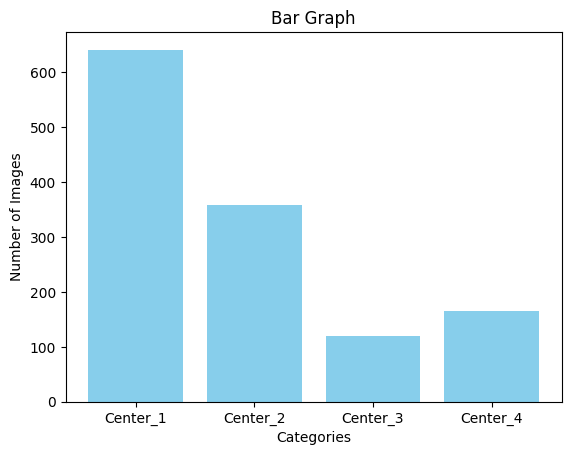

In [ ]:

values = [center_1_dataset.__len__(),center_2_dataset.__len__(),center_3_dataset.__len__(),center_4_dataset.__len__()]  # Replace with your actual values
labels = ['Center_1', 'Center_2', 'Center_3', 'Center_4']  # Replace with your category labels

plt.bar(labels, values, color='skyblue')
plt.title('Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()


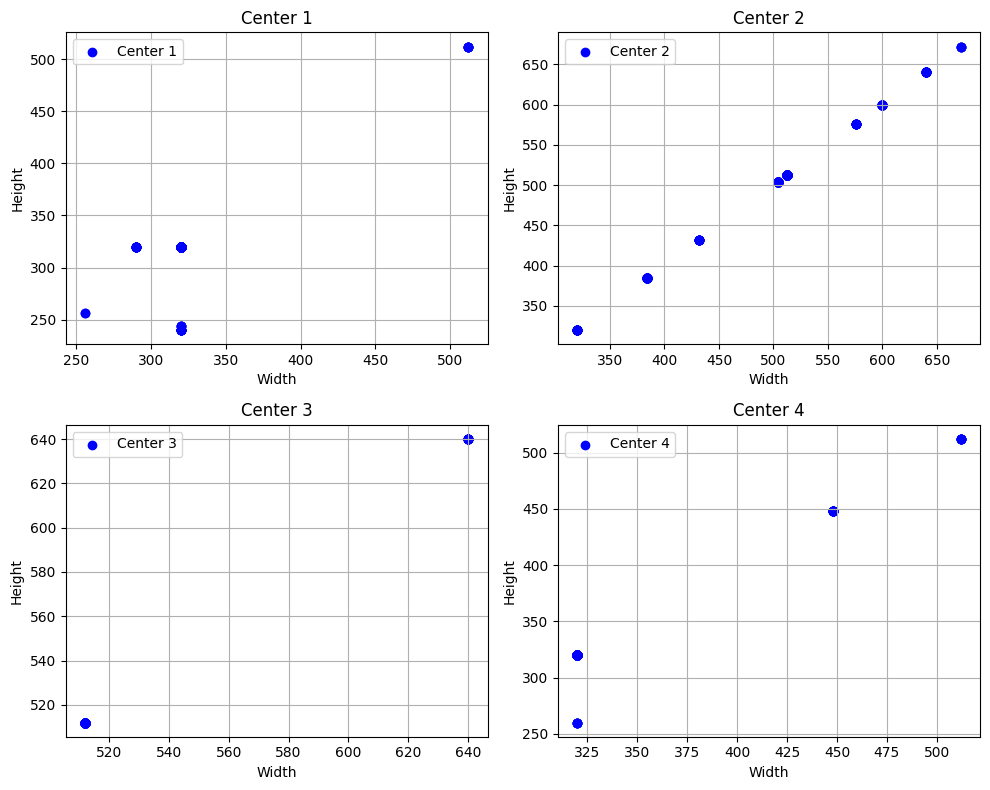

In [ ]:
# Initialize the plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for 4 centers

# Iterate through each center and its data
for i, ax in enumerate(axs.flatten()):
    center_dims = dims[i]
    widths = [w for w, h in center_dims]  # Extract widths
    heights = [h for w, h in center_dims]  # Extract heights

    # Scatter plot for each center
    ax.scatter(widths, heights, color='blue', label=f'Center {i+1}')
    ax.set_title(f'Center {i+1}')
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.legend()
    ax.grid(True)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


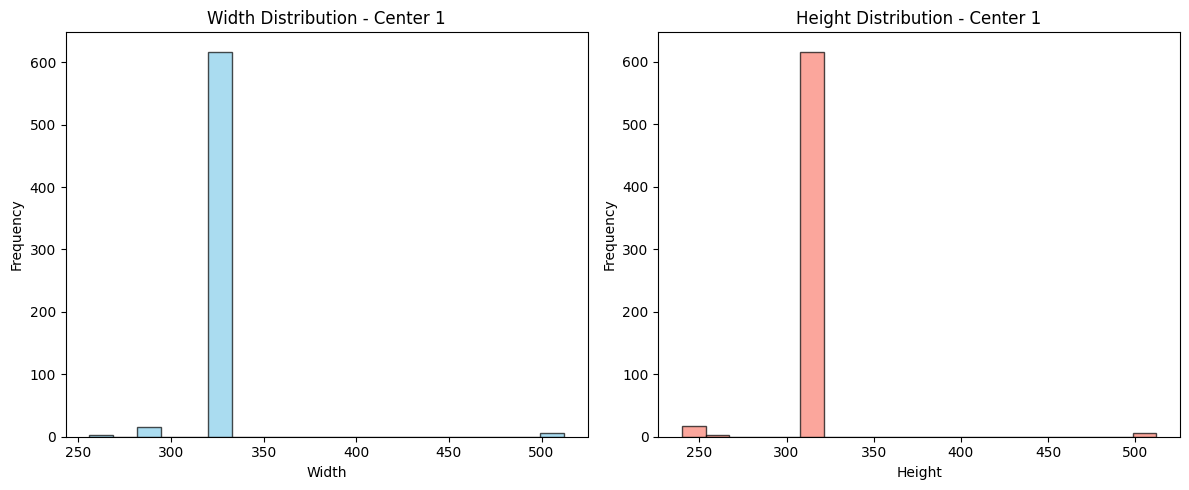

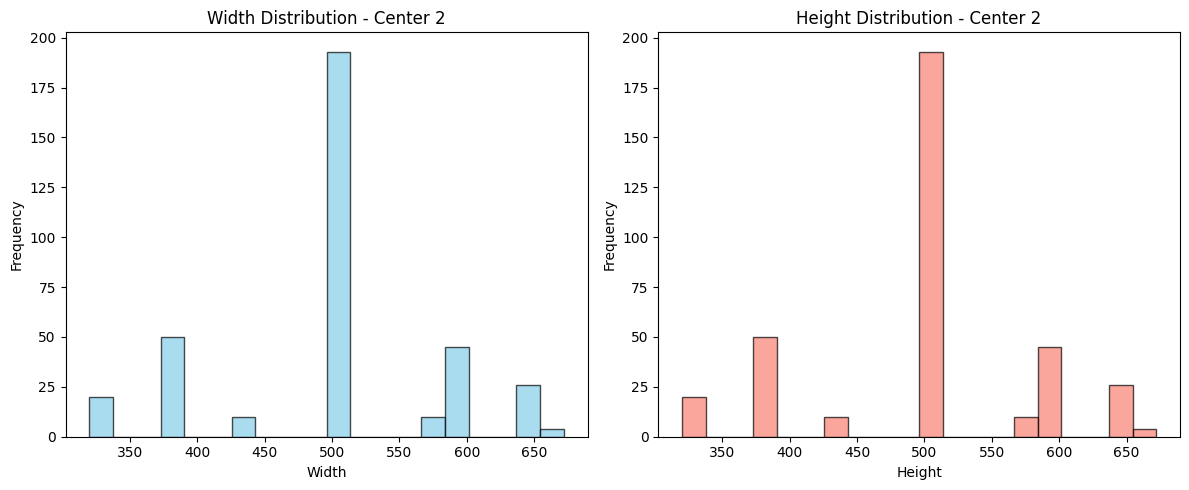

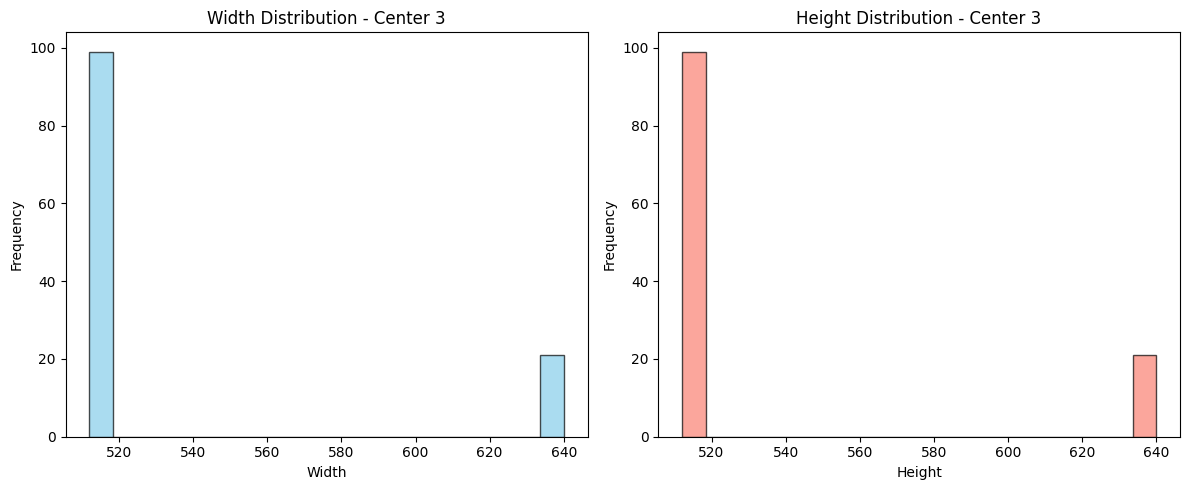

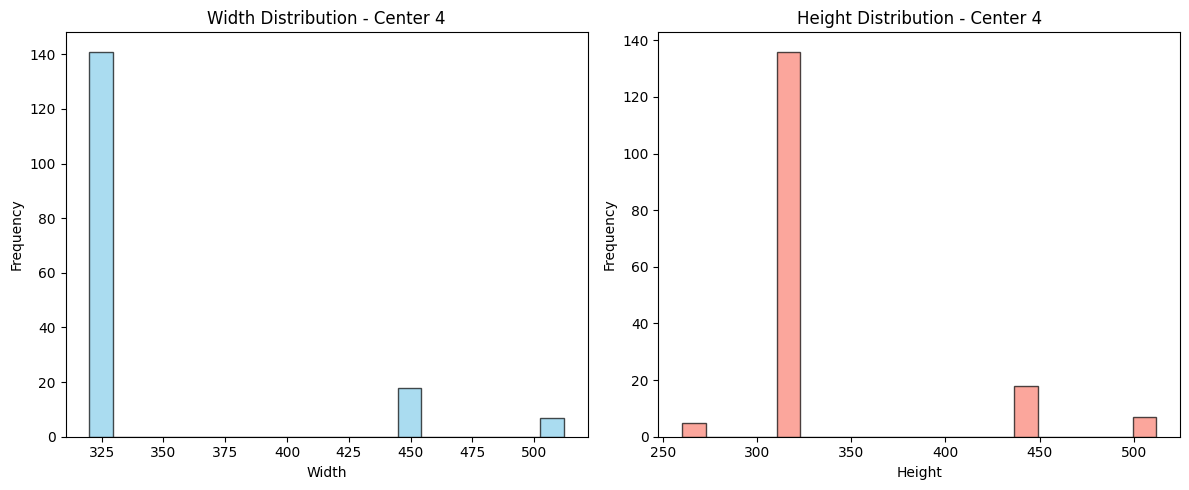

In [ ]:


# Plot histograms for width and height for each center
for i, center_dims in enumerate(dims):
    widths = [dim[0] for dim in center_dims]
    heights = [dim[1] for dim in center_dims]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Width Distribution - Center {i + 1}")
    plt.xlabel("Width")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='salmon', edgecolor='black', alpha=0.7)
    plt.title(f"Height Distribution - Center {i + 1}")
    plt.xlabel("Height")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


<ipython-input-9-10d0c26f3466>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Center", y="Width", palette="Set3")
<ipython-input-9-10d0c26f3466>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Center", y="Height", palette="Set3")


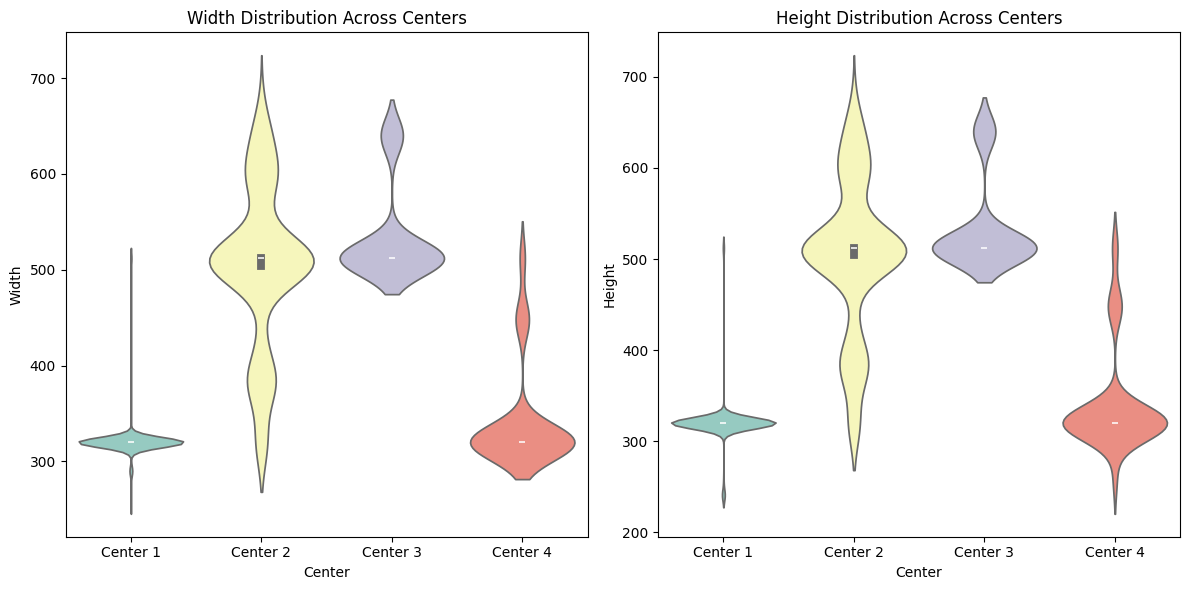

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dims is already populated as a list of lists of (width, height) tuples
# dims = [dims_center1, dims_center2, dims_center3, dims_center4]

# Create a list of dictionaries for each image's dimensions and center
data_list = []
for center_index, center_dims in enumerate(dims):
    for size in center_dims:
        data_list.append({
            "Center": f"Center {center_index + 1}",
            "Width": size[0],
            "Height": size[1]
        })

# Create the DataFrame
df = pd.DataFrame(data_list)

# Plot violin plots for widths and heights
plt.figure(figsize=(12, 6))

# Width Distribution
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x="Center", y="Width", palette="Set3")
plt.title("Width Distribution Across Centers")

# Height Distribution
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x="Center", y="Height", palette="Set3")
plt.title("Height Distribution Across Centers")

plt.tight_layout()
plt.show()


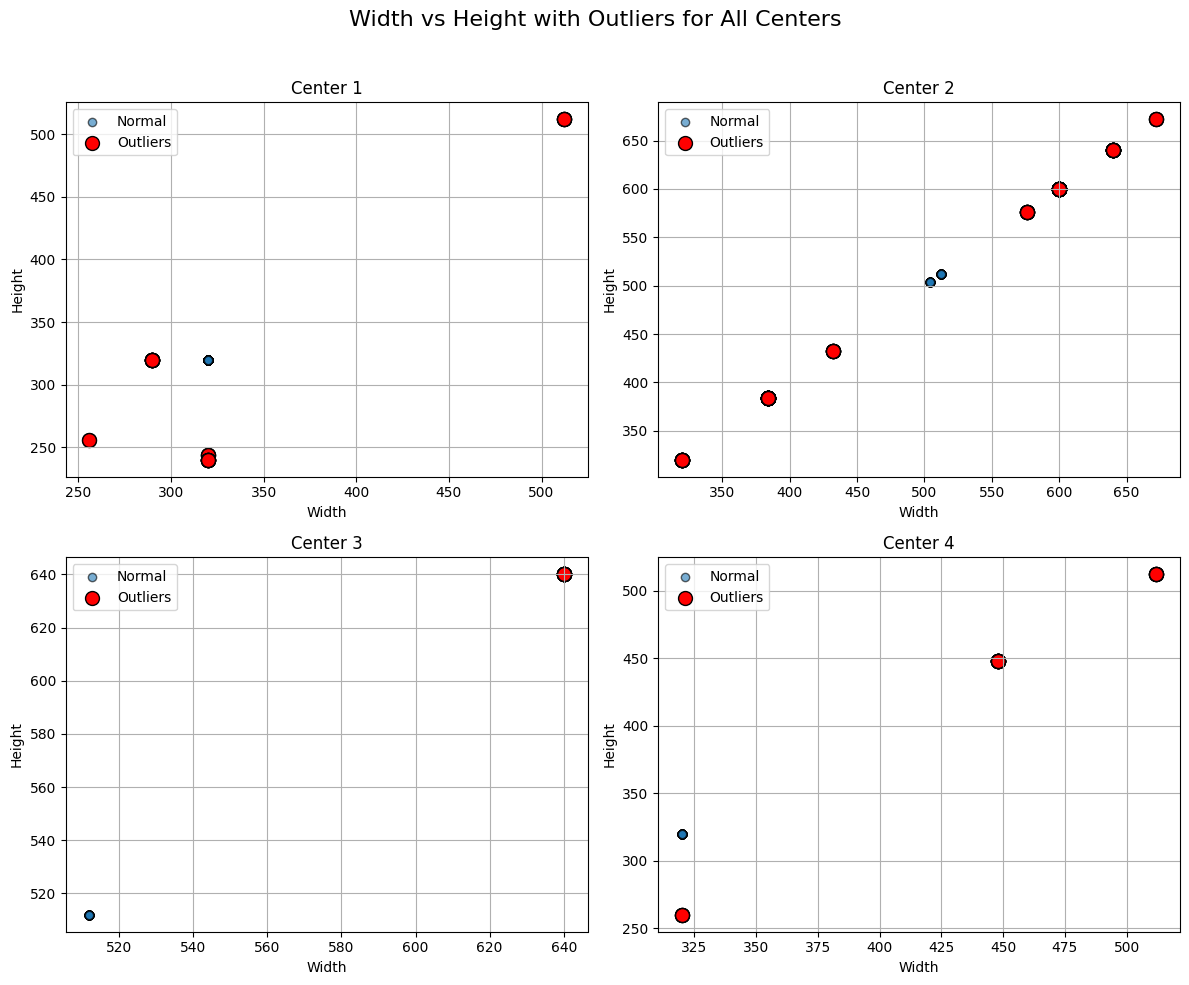

In [ ]:


# Set up the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Width vs Height with Outliers for All Centers", fontsize=16)

# Scatter plot with outliers marked for each center
for i, center_dims in enumerate(dims):
    widths = [dim[0] for dim in center_dims]
    heights = [dim[1] for dim in center_dims]

    # Compute IQR for width and height
    q1_w, q3_w = np.percentile(widths, [25, 75])
    iqr_w = q3_w - q1_w
    lower_bound_w, upper_bound_w = q1_w - 1.5 * iqr_w, q3_w + 1.5 * iqr_w

    q1_h, q3_h = np.percentile(heights, [25, 75])
    iqr_h = q3_h - q1_h
    lower_bound_h, upper_bound_h = q1_h - 1.5 * iqr_h, q3_h + 1.5 * iqr_h

    # Identify outliers
    outliers = [(w, h) for w, h in center_dims
                if w < lower_bound_w or w > upper_bound_w or h < lower_bound_h or h > upper_bound_h]

    # Determine subplot position
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Plot normal points and outliers
    ax.scatter(widths, heights, label="Normal", alpha=0.6, edgecolor='k')
    if outliers:
        outlier_widths = [dim[0] for dim in outliers]
        outlier_heights = [dim[1] for dim in outliers]
        ax.scatter(outlier_widths, outlier_heights, color='red', label="Outliers", edgecolor='k', s=100)

    ax.set_title(f"Center {i + 1}")
    ax.set_xlabel("Width")
    ax.set_ylabel("Height")
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Detect outliers in width and height using IQR
for i, center_dims in enumerate(dims):
    widths = [dim[0] for dim in center_dims]
    heights = [dim[1] for dim in center_dims]

    # Compute IQR
    q1_w, q3_w = np.percentile(widths, [25, 75])
    iqr_w = q3_w - q1_w
    lower_bound_w, upper_bound_w = q1_w - 1.5 * iqr_w, q3_w + 1.5 * iqr_w

    q1_h, q3_h = np.percentile(heights, [25, 75])
    iqr_h = q3_h - q1_h
    lower_bound_h, upper_bound_h = q1_h - 1.5 * iqr_h, q3_h + 1.5 * iqr_h

    # Identify outliers
    outliers_w = [w for w in widths if w < lower_bound_w or w > upper_bound_w]
    outliers_h = [h for h in heights if h < lower_bound_h or h > upper_bound_h]

    print(f"Center {i + 1}:")
    print(f"  Outliers in Width: {outliers_w}")
    print(f"  Outliers in Height: {outliers_h}")


Center 1:
  Outliers in Width: [512, 290, 290, 290, 290, 512, 512, 512, 290, 290, 256, 290, 290, 290, 290, 290, 290, 256, 290, 290, 290, 290, 512, 512]
  Outliers in Height: [512, 244, 244, 240, 512, 512, 512, 240, 256, 240, 256, 240, 244, 512, 244, 240, 512, 240, 240, 240, 240, 240, 240, 240, 240]
Center 2:
  Outliers in Width: [600, 600, 384, 600, 384, 600, 600, 384, 384, 320, 600, 320, 640, 384, 384, 384, 600, 320, 384, 384, 384, 384, 384, 384, 600, 320, 384, 600, 384, 384, 600, 640, 600, 600, 600, 384, 600, 600, 600, 600, 600, 600, 600, 320, 600, 384, 384, 432, 576, 640, 432, 640, 640, 432, 640, 640, 640, 576, 640, 576, 576, 640, 432, 576, 576, 640, 384, 600, 320, 384, 600, 640, 600, 320, 384, 320, 640, 576, 600, 384, 600, 432, 384, 384, 320, 640, 384, 672, 384, 384, 600, 384, 640, 576, 384, 640, 600, 384, 600, 384, 320, 600, 384, 600, 600, 640, 384, 640, 600, 672, 600, 384, 320, 640, 600, 320, 672, 432, 600, 576, 384, 384, 576, 640, 384, 600, 384, 640, 384, 384, 600, 432, 320, 432

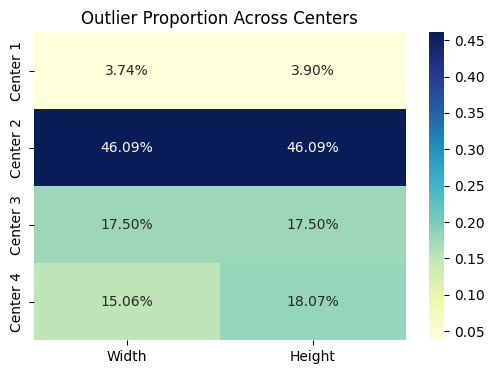

In [ ]:
# Calculate proportion of outliers for each center
outliers_proportion = []
for center_dims in dims:
    widths = [dim[0] for dim in center_dims]
    heights = [dim[1] for dim in center_dims]

    q1_w, q3_w = np.percentile(widths, [25, 75])
    iqr_w = q3_w - q1_w
    lower_bound_w, upper_bound_w = q1_w - 1.5 * iqr_w, q3_w + 1.5 * iqr_w

    q1_h, q3_h = np.percentile(heights, [25, 75])
    iqr_h = q3_h - q1_h
    lower_bound_h, upper_bound_h = q1_h - 1.5 * iqr_h, q3_h + 1.5 * iqr_h

    outliers_w = [w for w in widths if w < lower_bound_w or w > upper_bound_w]
    outliers_h = [h for h in heights if h < lower_bound_h or h > upper_bound_h]

    outliers_proportion.append([len(outliers_w) / len(widths), len(outliers_h) / len(heights)])

# Convert to heatmap format
outliers_proportion = np.array(outliers_proportion)

plt.figure(figsize=(6, 4))
sns.heatmap(outliers_proportion, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=["Width", "Height"], yticklabels=[f"Center {i + 1}" for i in range(4)])
plt.title("Outlier Proportion Across Centers")
plt.show()


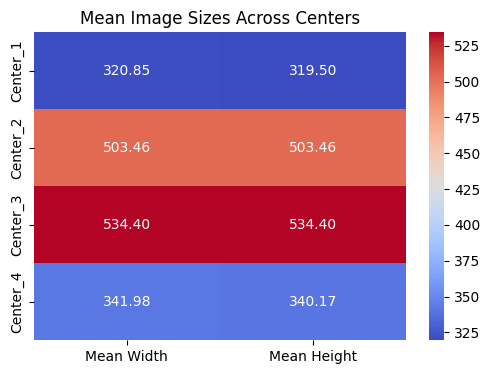

In [ ]:
import numpy as np
import seaborn as sns

# Calculate mean width and height for each center
mean_sizes = []
for center_dims in dims:
    widths = [dim[0] for dim in center_dims]
    heights = [dim[1] for dim in center_dims]
    mean_sizes.append([np.mean(widths), np.mean(heights)])

# Convert to numpy array for heatmap
mean_sizes = np.array(mean_sizes)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(mean_sizes, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Mean Width", "Mean Height"], yticklabels=[f"Center_{i + 1}" for i in range(4)])
plt.title("Mean Image Sizes Across Centers")
plt.show()


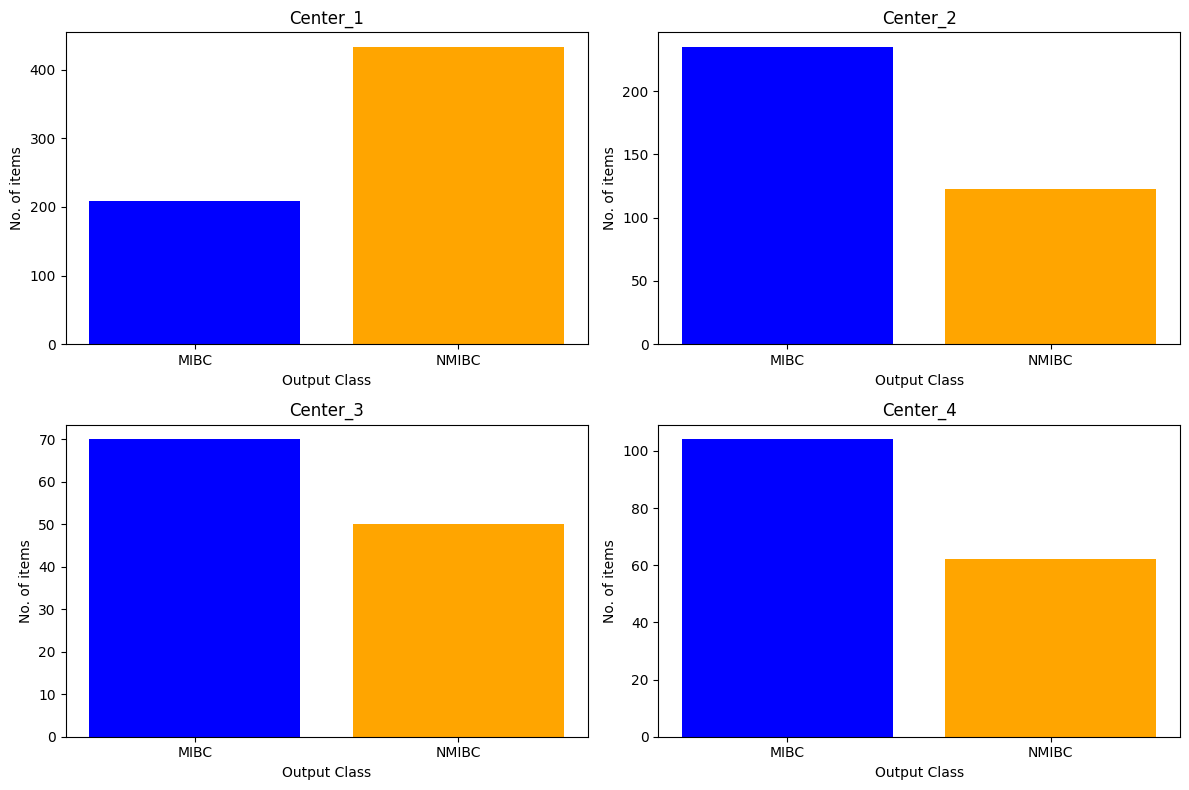

In [ ]:
categories = ["MIBC", "NMIBC"]

# Create subplots for the four centers
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid and position the subplot
    plt.title(f"Center_{i + 1}")
    plt.xlabel("Output Class")
    plt.ylabel("No. of items")

    # Plot the bar chart for the current center
    plt.bar(categories, freq_in_each_category[i], color=['blue', 'orange'])

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


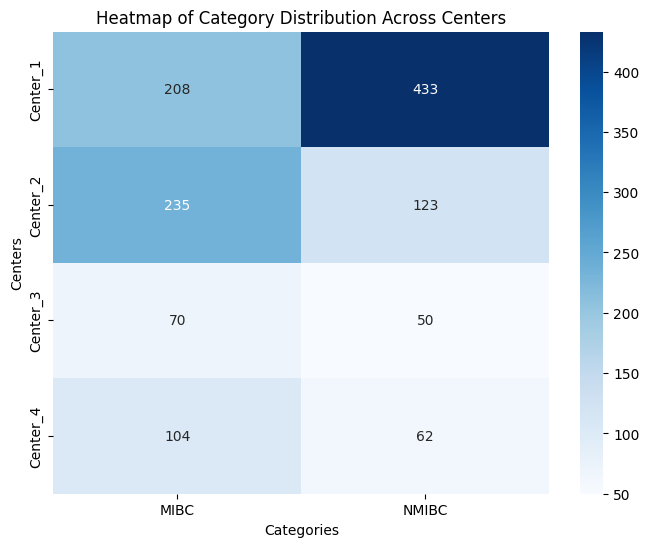

In [ ]:
heatmap_data = np.array(freq_in_each_category)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=[f"Center_{i+1}" for i in range(4)])
plt.title("Heatmap of Category Distribution Across Centers")
plt.xlabel("Categories")
plt.ylabel("Centers")
plt.show()


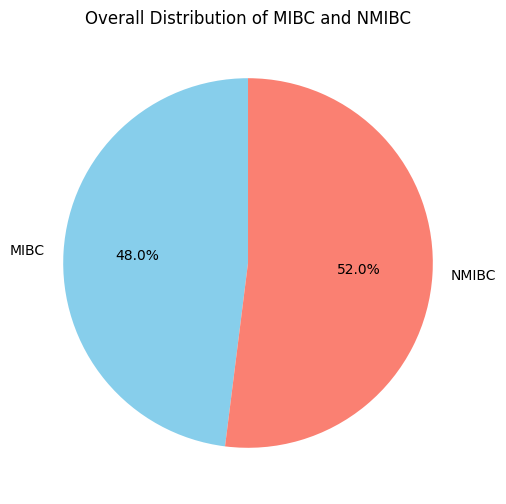

In [ ]:
# Aggregate total counts for each category
total_mibc = sum([freq[0] for freq in freq_in_each_category])
total_nmibc = sum([freq[1] for freq in freq_in_each_category])

# Data for pie chart
labels = ["MIBC", "NMIBC"]
sizes = [total_mibc, total_nmibc]
colors = ["skyblue", "salmon"]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Overall Distribution of MIBC and NMIBC")
plt.show()


<ipython-input-17-5f7791d63fe5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Category", y="Count", palette="Set2")


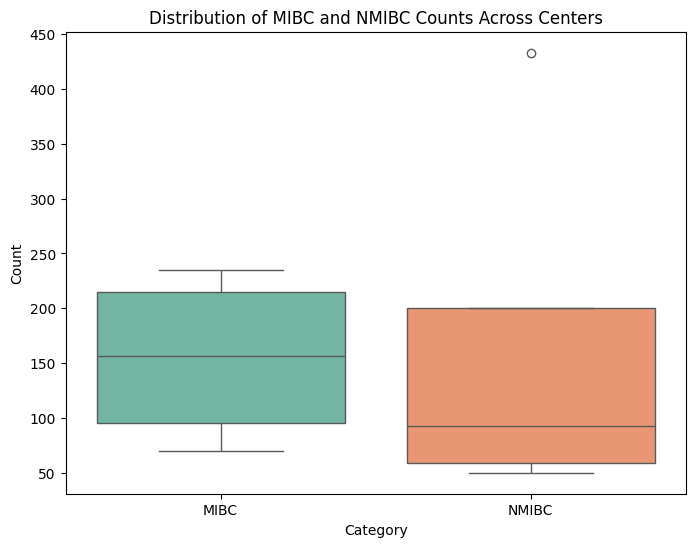

In [ ]:
# Prepare data for boxplot
df = pd.DataFrame(freq_in_each_category, columns=["MIBC", "NMIBC"])
df["Center"] = [f"Center_{i+1}" for i in range(4)]
df_melted = df.melt(id_vars="Center", var_name="Category", value_name="Count")

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_melted, x="Category", y="Count", palette="Set2")
plt.title("Distribution of MIBC and NMIBC Counts Across Centers")
plt.show()


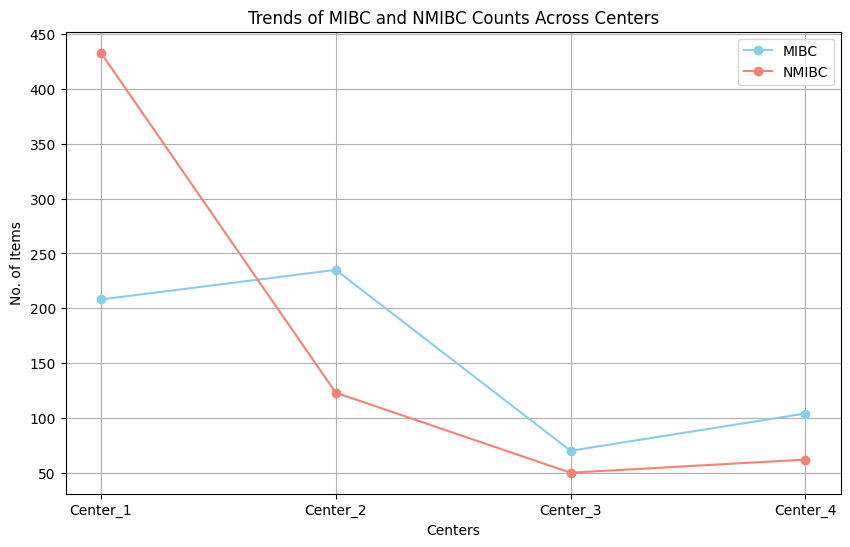

In [ ]:
# Derive counts for each center
mibc_counts = [freq[0] for freq in freq_in_each_category]
nmibc_counts = [freq[1] for freq in freq_in_each_category]

# Data preparation for centers
centers = [f"Center_{i+1}" for i in range(4)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(centers, mibc_counts, marker="o", label="MIBC", color="skyblue")
plt.plot(centers, nmibc_counts, marker="o", label="NMIBC", color="salmon")
plt.title("Trends of MIBC and NMIBC Counts Across Centers")
plt.xlabel("Centers")
plt.ylabel("No. of Items")
plt.legend()
plt.grid(True)
plt.show()


# Images Preprocessing

Trying to find out the best dimension for the images to resize

In [ ]:
import numpy as np

# Combine all dimensions from all centers
all_dims = [dim for center_dims in dims for dim in center_dims]

# Compute the median width and height
median_width = int(np.median([dim[0] for dim in all_dims]))
median_height = int(np.median([dim[1] for dim in all_dims]))

print(f"The recommended size to resize all images is: {median_width}x{median_height}")

NameError: name 'dims' is not defined

Trying to preprocess the images

In [ ]:
# # Target dimensions
# target_width = median_width
# target_height = median_height

# # Function for normalization (scales pixel values to [0, 1])
# def normalize_image(image):
#     return image / 255.0  # Assuming the image values are in [0, 255]

# # Function to add zero-padding to preserve the aspect ratio
# def pad_image(image, target_width, target_height):
#     h, w, c = image.shape
#     scale = min(target_width / w, target_height / h)
#     new_w = int(w * scale)
#     new_h = int(h * scale)
#     resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

#     # Create a black canvas of the target size
#     padded = np.zeros((target_height, target_width, c), dtype=image.dtype)
#     pad_h = (target_height - new_h) // 2
#     pad_w = (target_width - new_w) // 2

#     # Place the resized image on the black canvas
#     padded[pad_h:pad_h + new_h, pad_w:pad_w + new_w, :] = resized
#     return padded

# # Function to crop or resize the image directly to target dimensions
# def crop_or_resize(image, target_width, target_height):
#     h, w, c = image.shape

#     # If image size is larger, center crop it
#     if h > target_height or w > target_width:
#         center_h, center_w = h // 2, w // 2
#         crop_h = target_height // 2
#         crop_w = target_width // 2
#         cropped = image[center_h - crop_h:center_h + crop_h, center_w - crop_w:center_w + crop_w]
#         return cv2.resize(cropped, (target_width, target_height), interpolation=cv2.INTER_LINEAR)

#     # Otherwise, resize directly
#     return cv2.resize(cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed/image_1.png",preprocessed_img*255), (target_width, target_height), interpolation=cv2.INTER_LINEAR)

# # Function for full preprocessing
# def preprocess_image(image, target_width, target_height, padding=True):
#     """
#     Preprocesses a 4-channel image with normalization, resizing, and optional padding.
#     :param image: Input image (NumPy array).
#     :param target_width: Desired width.
#     :param target_height: Desired height.
#     :param padding: If True, applies padding to preserve the aspect ratio.
#     :return: Preprocessed image.
#     """
#     # Normalize the image
#     normalized = normalize_image(image)

#     # Apply padding or direct cropping/resizing
#     if padding:
#         preprocessed = pad_image(normalized, target_width, target_height)
#     else:
#         preprocessed = crop_or_resize(normalized, target_width, target_height)

#     return preprocessed


# # img=np.array(center_1_dataset.__getitem__(0)[0])
# # preprocessed_img = preprocess_image(img, target_width, target_height, padding=True)

# # print(preprocessed_img.shape)
# # cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed/image_1.png",preprocessed_img*255)

# # print("All images have been preprocessed.")


In [ ]:
import numpy as np
from PIL import Image
import SimpleITK as sitk
from scipy.ndimage import label, find_objects

def bias_field_correction(channel_np):
    """
    Apply bias field correction to a single-channel image.
    """
    sitk_image = sitk.GetImageFromArray(channel_np)
    # Create a mask using Otsu thresholding
    mask = sitk.OtsuThreshold(sitk_image, 0, 1, 200)
    corrected = sitk.N4BiasFieldCorrection(sitk_image, mask)
    corrected_np = sitk.GetArrayFromImage(corrected)
    return corrected_np

def crop_to_white_blob(image_np):
    """
    Crop the image to the bounding box of the connected component
    (from the white blob) that contains the center of the image.
    """
    # Convert first three channels (RGB) to grayscale by averaging
    gray = np.mean(image_np[:, :, :3], axis=2)
    # Create a binary mask; adjust threshold as needed for your data
    binary = gray > 200

    # Label connected regions and find bounding boxes
    labeled, num_features = label(binary)
    center_y, center_x = gray.shape[0] // 2, gray.shape[1] // 2
    selected_bbox = None
    objects = find_objects(labeled)
    for i, slice_tuple in enumerate(objects, start=1):
        y_slice, x_slice = slice_tuple
        # Check if the image center lies within the component's bounding box
        if (y_slice.start <= center_y < y_slice.stop) and (x_slice.start <= center_x < x_slice.stop):
            selected_bbox = slice_tuple
            break

    if selected_bbox is not None:
        y_slice, x_slice = selected_bbox
        cropped = image_np[y_slice, x_slice, :]
        return cropped
    else:
        # If no white blob is detected near the center, return the original image
        return image_np

def zscore_normalize(image_np):
    """
    Apply per-channel z-score normalization.
    """
    # Process each channel independently
    for c in range(image_np.shape[2]):
        channel = image_np[:, :, c]
        mean = channel.mean()
        std = channel.std()
        if std > 0:
            image_np[:, :, c] = (channel - mean) / std
        else:
            image_np[:, :, c] = channel - mean
    return image_np

def rescale_to_uint8(image_np):
    """
    Rescale each channel of a normalized image to the 0-255 range and convert to uint8.
    """
    rescaled = np.zeros_like(image_np)
    for c in range(image_np.shape[2]):
        channel = image_np[:, :, c]
        min_val = channel.min()
        max_val = channel.max()
        if max_val > min_val:
            # Scale channel linearly to 0-255
            rescaled[:, :, c] = ((channel - min_val) / (max_val - min_val) * 255).astype(np.uint8)
        else:
            rescaled[:, :, c] = np.zeros_like(channel, dtype=np.uint8)
    return rescaled

def preprocess_image(image_path, store_path):
    """
    Processes an image by performing bias field correction (channel-wise), cropping to the
    central white blob, resizing to 320x320, and applying per-channel z-score normalization.
    The normalized image is then re-scaled to 0-255 and saved as an image file at store_path.

    Parameters:
      image_path (str): Path to the input image.
      store_path (str): Path to save the processed image (e.g., 'processed_image.png').
    """
    # Load the image and convert to RGBA (ensuring 4 channels)
    image = Image.open(image_path).convert("RGBA")
    image_np = np.array(image).astype(np.float32)  # Shape: (H, W, 4)

    # --- Bias Field Correction (channel-by-channel) ---
    corrected = np.zeros_like(image_np)
    for c in range(image_np.shape[2]):
        corrected[:, :, c] = bias_field_correction(image_np[:, :, c])
    image_np = corrected

    # --- Crop to Middle White Blob ---
    image_np = crop_to_white_blob(image_np)

    # --- Resize to 320x320 ---
    # Convert to PIL image for resizing; clip values to [0,255] and convert to uint8
    pil_img = Image.fromarray(np.clip(image_np, 0, 255).astype(np.uint8))
    pil_img = pil_img.resize((320, 320), resample=Image.BILINEAR)
    image_np = np.array(pil_img).astype(np.float32)

    # --- Z-Score Normalization ---
    image_np = zscore_normalize(image_np)

    # --- Re-scale normalized image to 0-255 ---
    image_uint8 = rescale_to_uint8(image_np)

    # Save the final processed image
    final_img = Image.fromarray(image_uint8)
    final_img.save(store_path)
    # print(f"Processed image saved to {store_path}")


In [ ]:
for i in range(center_1_dataset.__len__()):
  image_path,gt=center_1_dataset.__getitem__(i)
  if (gt==0):
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed/muscle invasive bladder/image_"+str(i)+".png")
  else:
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed/non muscle invasive bladder/image_"+str(i)+".png")

TypeError: 'int' object is not callable

In [ ]:
for i in range(center_2_dataset.__len__()):
  image_path,gt=center_2_dataset.__getitem__(i)
  if (gt==0):
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_2_Preprocessed/muscle invasive bladder/image_"+str(i)+".png")
  else:
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_2_Preprocessed/non muscle invasive bladder/image_"+str(i)+".png")


TypeError: 'int' object is not callable

In [ ]:
for i in range(center_3_dataset.__len__()):
  image_path,gt=center_3_dataset.__getitem__(i)
  if (gt==0):
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_3_Preprocessed/muscle invasive bladder/image_"+str(i)+".png")
  else:
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_3_Preprocessed/non muscle invasive bladder/image_"+str(i)+".png")



In [ ]:
for i in range(center_4_dataset.__len__()):
  image_path,gt=center_4_dataset.__getitem__(i)
  if (gt==0):
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_4_Preprocessed/muscle invasive bladder/image_"+str(i)+".png")
  else:
    preprocess_image(image_path, "/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_4_Preprocessed/non muscle invasive bladder/image_"+str(i)+".png")


# Mock training accuracy

In [ ]:
class custom_dataset():
  def __init__(self,folder_path):
    self.image_paths=[]
    self.output_classes=[]

    for categories in os.listdir(folder_path):
      for image_name in os.listdir(os.path.join(folder_path,categories)):
        self.image_paths.append(os.path.join(folder_path,categories,image_name))
        if (categories=="muscle invasive bladder"):
          self.output_classes.append(0)
        else:
          self.output_classes.append(1)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self,idx):
    image=Image.open(self.image_paths[idx])
    image=np.array(image)
    image=np.reshape(image,(image.shape[2],image.shape[0],image.shape[1]))
    image=torch.Tensor(image)

    return image,self.output_classes[idx]


In [ ]:
Center_1_Preprocessed_dataset=custom_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed")

print(Center_1_Preprocessed_dataset.__len__())

image,label=Center_1_Preprocessed_dataset.__getitem__(625)

print(image.shape)
print(label)

626
torch.Size([4, 320, 320])
0


In [ ]:
Center_1_Preprocessed_dataset=custom_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed")
center_1_dataloader=DataLoader(Center_1_Preprocessed_dataset, batch_size=3, shuffle=False)

In [ ]:
#This is not very flexible, fixed input and output neurons

class sample_CNN_model(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels=4, out_channels=32, kernel_size=3, stride=1, padding=1)


    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

    self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=40, stride=1, padding=0)

    self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    self.fc1 = nn.Linear(128, 60)
    self.fc2 = nn.Linear(60, 2)

  def forward(self,x):

    x = self.pool(F.relu(self.conv1(x)))


    x = self.pool(F.relu(self.conv2(x)))


    x = self.pool(F.relu(self.conv3(x)))

    x=self.conv4(x)


    x = torch.reshape(x,(x.shape[0],-1))


    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x

In [ ]:
# Assuming your model and dataset are already defined as sample_CNN_model and custom_dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Function for one epoch of training
# def train_one_epoch(model, dataloader, criterion, optimizer):
#     model.train()  # Set the model to training mode
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     for i,(inputs, labels) in enumerate(dataloader):
#         inputs, labels = inputs.to(device), labels.to(device)
#         # print("Inputs.shape:",inputs.shape)
#         # print("labels.shape:",labels.shape)

#         outputs = model(inputs)
#         # print(outputs.shape)

#         # Compute the loss
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#         # Track statistics
#         running_loss += loss.item()
#         predicted = torch.argmax(outputs, dim=1)
#         total += labels.shape[0]
#         correct += (predicted == labels).sum().item()

#         print("The Batch number : ", i+1)

#     # Print statistics for the epoch
#     epoch_loss = running_loss / len(dataloader)
#     epoch_accuracy = 100 * correct / total
#     print(f"Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
#     return epoch_loss, epoch_accuracy


import torch
from sklearn.metrics import precision_score, recall_score, f1_score  # Make sure scikit-learn is installed

def train_one_epoch(model, dataloader, criterion, optimizer):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    all_labels = []
    all_preds = []

    for i, (inputs, labels) in enumerate(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Track statistics
        running_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

        # Store predictions and labels for computing additional metrics later
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        print("The Batch number : ", i + 1)

    # Compute average loss and accuracy
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total

    # Calculate additional metrics using scikit-learn
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0) * 100
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0) * 100
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0) * 100

    print(f"Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # Return metrics as a dictionary
    return {
        'loss': epoch_loss,
        'accuracy': epoch_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


# Initialize your model, loss function, and optimizer
model = sample_CNN_model().to(device)
criterion = nn.CrossEntropyLoss()  # Assuming classification task
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
# Train for one epoch
return_dict = train_one_epoch(model, center_1_dataloader, criterion, optimizer)

The Batch number :  1
The Batch number :  2
The Batch number :  3
The Batch number :  4
The Batch number :  5
The Batch number :  6
The Batch number :  7
The Batch number :  8
The Batch number :  9
The Batch number :  10
The Batch number :  11
The Batch number :  12
The Batch number :  13
The Batch number :  14
The Batch number :  15
The Batch number :  16
The Batch number :  17
The Batch number :  18
The Batch number :  19
The Batch number :  20
The Batch number :  21
The Batch number :  22
The Batch number :  23
The Batch number :  24
The Batch number :  25
The Batch number :  26
The Batch number :  27
The Batch number :  28
The Batch number :  29
The Batch number :  30
The Batch number :  31
The Batch number :  32
The Batch number :  33
The Batch number :  34
The Batch number :  35
The Batch number :  36
The Batch number :  37
The Batch number :  38
The Batch number :  39
The Batch number :  40
The Batch number :  41
The Batch number :  42
The Batch number :  43
The Batch number :  

In [ ]:
torch.save(model,"/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/sample_model.pth")
torch.save(model.state_dict(),"/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/sample_model_state_dict.pth")

In [ ]:
# # Function for one epoch of testing
# def test_one_epoch(model, dataloader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     with torch.no_grad():  # Disable gradient tracking during evaluation
#         for i,(inputs, labels) in enumerate(dataloader):
#             inputs, labels = inputs.to(device), labels.to(device)

#             # Forward pass
#             outputs = model(inputs)

#             # Compute the loss
#             loss = criterion(outputs, labels)

#             # Track statistics
#             running_loss += loss.item()
#             predicted = torch.argmax(outputs, dim=1)
#             total += labels.shape[0]
#             correct += (predicted == labels).sum().item()

#             print("Batch number : ",i+1)

#     # Print statistics for the epoch
#     epoch_loss = running_loss / len(dataloader)
#     epoch_accuracy = 100 * correct / total
#     print(f"Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
#     return epoch_loss, epoch_accuracy





import torch
from sklearn.metrics import precision_score, recall_score, f1_score  # Ensure sklearn is installed

def test_one_epoch(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    all_labels = []
    all_preds = []

    with torch.no_grad():  # Disable gradient tracking during evaluation
        for i, (inputs, labels) in enumerate(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Track statistics
            running_loss += loss.item()
            predicted = torch.argmax(outputs, dim=1)
            total += labels.shape[0]
            correct += (predicted == labels).sum().item()

            # Store predictions and labels for further metrics
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            print("Batch number : ", i + 1)

    # Compute average loss and accuracy
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total

    # Compute precision, recall, and F1 score
    # Using 'weighted' average to account for class imbalance if any.
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0) * 100
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0) * 100
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0) * 100

    print(f"Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # Return all metrics as a dictionary
    return {
        'loss': epoch_loss,
        'accuracy': epoch_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [ ]:
center_2_Preprocessed_dataset = custom_dataset(folder_path='/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_2_Preprocessed')

center_2_dataloader = DataLoader(center_2_Preprocessed_dataset,   =3, shuffle=False)

In [ ]:
return_dict = test_one_epoch(model, center_2_dataloader, criterion)

print("The test accuracy is : ",test_loss)

Batch number :  1
Batch number :  2
Batch number :  3
Batch number :  4
Batch number :  5
Batch number :  6
Batch number :  7
Batch number :  8
Batch number :  9
Batch number :  10
Batch number :  11
Batch number :  12
Batch number :  13
Batch number :  14
Batch number :  15
Batch number :  16
Batch number :  17
Batch number :  18
Batch number :  19
Batch number :  20
Batch number :  21
Batch number :  22
Batch number :  23
Batch number :  24
Batch number :  25
Batch number :  26
Batch number :  27
Batch number :  28
Batch number :  29
Batch number :  30
Batch number :  31
Batch number :  32
Batch number :  33
Batch number :  34
Batch number :  35
Batch number :  36
Batch number :  37
Batch number :  38
Batch number :  39
Batch number :  40
Batch number :  41
Batch number :  42
Batch number :  43
Batch number :  44
Batch number :  45
Batch number :  46
Batch number :  47
Batch number :  48
Batch number :  49
Batch number :  50
Batch number :  51
Batch number :  52
Batch number :  53
Ba

# Applying rounds of federated learning

In [ ]:
Center_1_Preprocessed_dataset=custom_dataset("/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_1_Preprocessed")
center_2_Preprocessed_dataset = custom_dataset(folder_path='/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_2_Preprocessed')
center_3_Preprocessed_dataset = custom_dataset(folder_path='/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_3_Preprocessed')
center_4_Preprocessed_dataset = custom_dataset(folder_path='/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_4_Preprocessed')
test_dataset=custom_dataset(folder_path='/content/drive/MyDrive/Colab Notebooks/Data/Bladder_Cancer_Detection/Center_4_Preprocessed')
center_1_dataloader=DataLoader(Center_1_Preprocessed_dataset, batch_size=3, shuffle=False)
center_2_dataloader = DataLoader(center_2_Preprocessed_dataset, batch_size=3, shuffle=False)
center_3_dataloader = DataLoader(center_3_Preprocessed_dataset, batch_size=3, shuffle=False)
center_4_dataloader = DataLoader(center_4_Preprocessed_dataset, batch_size=3, shuffle=False)
test_dataloader=DataLoader(test_dataset,batch_size=3,shuffle=False)

In [ ]:
import copy
import torch
import matplotlib.pyplot as plt

def federated_learning_round(global_model, train_loaders, test_loader, num_rounds=5):
    # Move the global model to GPU
    global_model = global_model

    # Initialize dictionaries to store metrics for each client
    num_clients = len(train_loaders)
    local_metrics = {i: {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for i in range(num_clients)}

    # Dictionary to store global model metrics per round
    global_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for round_num in range(num_rounds):
        print(f"Round {round_num + 1}/{num_rounds}")

        # 1. Clients (DataLoaders) train the model locally
        local_models = []
        for i, train_loader in enumerate(train_loaders):
            # Deep copy the global model for local training
            local_model = copy.deepcopy(global_model)
            optimizer = get_optimizer(local_model)
            # Assume train_one_epoch returns a dict with keys: 'loss', 'accuracy', 'precision', 'recall', 'f1'
            metrics = train_one_epoch(local_model, train_loader, criterion, optimizer)

            print(f"Client {i + 1} -> Loss: {metrics['loss']:.4f}, Accuracy: {metrics['accuracy']:.2f}%, "
                  f"Precision: {metrics['precision']:.2f}%, Recall: {metrics['recall']:.2f}%, F1: {metrics['f1']:.2f}%")

            # Save the metrics for plotting later
            for key in local_metrics[i]:
                local_metrics[i][key].append(metrics[key])

            local_models.append(local_model)

        # 2. Federated Averaging - Aggregating the model updates (weights)
        global_state_dict = global_model.state_dict()
        client_updates = [client_model.state_dict() for client_model in local_models]

        # Average the weights across all clients
        for key in global_state_dict.keys():
            global_state_dict[key] = torch.stack([client_update[key].float() for client_update in client_updates], dim=0).mean(dim=0)

        # 3. Update the global model with the aggregated weights
        global_model.load_state_dict(global_state_dict)

        # 4. Global evaluation on the test dataset
        # Assume test_one_epoch returns a dict with the same keys as above
        global_eval = test_one_epoch(global_model, test_loader, criterion, return_metrics=True)
        print(f"Global Model Test -> Loss: {global_eval['loss']:.4f}, Accuracy: {global_eval['accuracy']:.2f}%, "
              f"Precision: {global_eval['precision']:.2f}%, Recall: {global_eval['recall']:.2f}%, F1: {global_eval['f1']:.2f}%")

        for key in global_metrics:
            global_metrics[key].append(global_eval[key])

    # Plot Global Model Metrics
    rounds = list(range(1, num_rounds + 1))
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.plot(rounds, global_metrics['loss'], marker='o')
    plt.title('Global Loss')
    plt.xlabel('Round')
    plt.ylabel('Loss')

    plt.subplot(2, 3, 2)
    plt.plot(rounds, global_metrics['accuracy'], marker='o')
    plt.title('Global Accuracy')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')

    plt.subplot(2, 3, 3)
    plt.plot(rounds, global_metrics['precision'], marker='o')
    plt.title('Global Precision')
    plt.xlabel('Round')
    plt.ylabel('Precision (%)')

    plt.subplot(2, 3, 4)
    plt.plot(rounds, global_metrics['recall'], marker='o')
    plt.title('Global Recall')
    plt.xlabel('Round')
    plt.ylabel('Recall (%)')

    plt.subplot(2, 3, 5)
    plt.plot(rounds, global_metrics['f1'], marker='o')
    plt.title('Global F1 Score')
    plt.xlabel('Round')
    plt.ylabel('F1 Score (%)')

    plt.tight_layout()
    plt.show()

    # Plot each client's metrics
    for i in range(num_clients):
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 3, 1)
        plt.plot(rounds, local_metrics[i]['loss'], marker='o')
        plt.title(f'Client {i+1} Loss')
        plt.xlabel('Round')
        plt.ylabel('Loss')

        plt.subplot(2, 3, 2)
        plt.plot(rounds, local_metrics[i]['accuracy'], marker='o')
        plt.title(f'Client {i+1} Accuracy')
        plt.xlabel('Round')
        plt.ylabel('Accuracy (%)')

        plt.subplot(2, 3, 3)
        plt.plot(rounds, local_metrics[i]['precision'], marker='o')
        plt.title(f'Client {i+1} Precision')
        plt.xlabel('Round')
        plt.ylabel('Precision (%)')

        plt.subplot(2, 3, 4)
        plt.plot(rounds, local_metrics[i]['recall'], marker='o')
        plt.title(f'Client {i+1} Recall')
        plt.xlabel('Round')
        plt.ylabel('Recall (%)')

        plt.subplot(2, 3, 5)
        plt.plot(rounds, local_metrics[i]['f1'], marker='o')
        plt.title(f'Client {i+1} F1 Score')
        plt.xlabel('Round')
        plt.ylabel('F1 Score (%)')

        plt.tight_layout()
        plt.show()

    return global_model


In [ ]:
global_model = sample_CNN_model()
criterion = torch.nn.CrossEntropyLoss()

# Optimizer
def get_optimizer(model):
    return optim.Adam(model.parameters(), lr=0.01)

train_loaders = [center_1_dataloader, center_2_dataloader, center_3_dataloader, center_4_dataloader]  # 4 data loaders
test_loader = test_dataloader

# Start Federated Learning with 5 rounds
global_model=federated_learning_round(global_model, train_loaders, test_loader, num_rounds=5)

Round 1/5
The Batch number :  1
The Batch number :  2
The Batch number :  3
The Batch number :  4
The Batch number :  5
The Batch number :  6
The Batch number :  7
The Batch number :  8
The Batch number :  9
The Batch number :  10
The Batch number :  11
The Batch number :  12
The Batch number :  13
The Batch number :  14
The Batch number :  15
The Batch number :  16
The Batch number :  17
The Batch number :  18
The Batch number :  19
The Batch number :  20
The Batch number :  21
The Batch number :  22
The Batch number :  23
The Batch number :  24
The Batch number :  25
The Batch number :  26
The Batch number :  27
The Batch number :  28
The Batch number :  29
The Batch number :  30
The Batch number :  31
The Batch number :  32
The Batch number :  33
The Batch number :  34
The Batch number :  35
The Batch number :  36
The Batch number :  37
The Batch number :  38
The Batch number :  39
The Batch number :  40
The Batch number :  41
The Batch number :  42
The Batch number :  43
The Batch 

TypeError: test_one_epoch() got an unexpected keyword argument 'return_metrics'